In [186]:
import numpy as np
import pandas as pd
import sklearn as sk
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as pl
%matplotlib inline

In [106]:
df_train=pd.read_csv('../../data/training_dataset_500.csv')
df_test=pd.read_csv('../../data/test_dataset_500.csv')
df_data=pd.read_csv('../../data/dataset_500.csv')

In [162]:
# Add an arbitrary day column for DateTime format
df_train['Day']=int(1)

In [108]:
# Make new column containing the date (in Datetime format) by combining month and year columns
df_train['Date'] = df_train.apply(lambda x: datetime(int(x['Year']), int(x['Month']), int(x['Day'])),axis=1)

In [110]:
df_train.set_index('ID')
df_train.head(5)


,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction,Day,Date
0,0,0,1,2011,7,26.2,178.9,740,1,2011-07-01
1,1,1,1,2011,8,25.8,169.7,731,1,2011-08-01
2,2,2,1,2011,9,22.8,170.2,694,1,2011-09-01
3,3,3,1,2011,10,16.4,169.1,688,1,2011-10-01
4,4,4,1,2011,11,11.4,169.1,650,1,2011-11-01


In [111]:
df_train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11490, 11491, 11492, 11493, 11494, 11495, 11496, 11497, 11498,
            11499],
           dtype='int64', length=11500)

In [115]:
# Get average from all houses for each date
df_train_total=df_train.groupby('Date').mean()

In [116]:
df_train_total.head(5)

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction,Day
Date,,,,,,,,,
2011-07-01,5988,0,250.5,2011,7,26.3674,180.3912,630.064,1
2011-08-01,5989,1,250.5,2011,8,26.2242,169.5284,598.552,1
2011-09-01,5990,2,250.5,2011,9,23.4076,172.6860,574.912,1
2011-10-01,5991,3,250.5,2011,10,17.1112,156.8640,529.460,1
2011-11-01,5992,4,250.5,2011,11,12.1032,162.5342,495.008,1


In [125]:
df_train_total.head()

,Temperature,Daylight,EnergyProduction
Date,,,
2011-07-01,26.3674,180.3912,630.064
2011-08-01,26.2242,169.5284,598.552
2011-09-01,23.4076,172.6860,574.912
2011-10-01,17.1112,156.8640,529.460
2011-11-01,12.1032,162.5342,495.008


In [129]:
# Extract output and potantial correlating columns
df_energy=df_train_total['EnergyProduction']
df_temp=df_train_total['Temperature']
df_daylight=df_train_total['Daylight']

(array([ 734319.,  734381.,  734442.,  734503.,  734563.,  734624.,
         734685.,  734747.,  734808.,  734869.,  734928.,  734989.]),
 <a list of 12 Text xticklabel objects>)

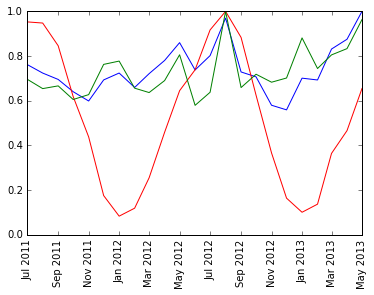

In [134]:
# Plot normalised average parameters to visually inspect
pl.plot(df_energy/np.max(df_energy))
pl.plot(df_temp/np.max(df_temp),color="r")
pl.plot(df_daylight/np.max(df_daylight),color="g")
pl.xticks(rotation=90)


In [139]:
# Take the log to anaylse and remove seasonality (to make stationary)
energy_log=np.log(df_energy)

In [142]:
# Decompose into seasonal and residual parts
decomposition=seasonal_decompose(energy_log)

In [161]:
seasonal=decomposition.seasonal
residual=decomposition.resid

seasonal # All NaN (not enough data?) 

Date
2011-07-01   NaN
2011-08-01   NaN
2011-09-01   NaN
2011-10-01   NaN
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-04-01   NaN
2012-05-01   NaN
2012-06-01   NaN
2012-07-01   NaN
2012-08-01   NaN
2012-09-01   NaN
2012-10-01   NaN
2012-11-01   NaN
2012-12-01   NaN
2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
Name: EnergyProduction, dtype: float64

In [158]:
energy_log

Date
2011-07-01    6.445821
2011-08-01    6.394513
2011-09-01    6.354217
2011-10-01    6.271858
2011-11-01    6.204574
2011-12-01    6.351078
2012-01-01    6.394670
2012-02-01    6.301068
2012-03-01    6.390871
2012-04-01    6.469700
2012-05-01    6.567117
2012-06-01    6.413492
2012-07-01    6.497104
2012-08-01    6.687403
2012-09-01    6.401327
2012-10-01    6.370757
2012-11-01    6.172243
2012-12-01    6.135890
2013-01-01    6.362424
2013-02-01    6.350771
2013-03-01    6.533161
2013-04-01    6.584623
2013-05-01    6.718141
Name: EnergyProduction, dtype: float64

In [ ]:
# Try Auto-Regressive Integrated Moving Averages

In [183]:
energy_diff=df_energy-df_energy.shift()

In [165]:
# Determine p and q values for ARIMA from acf and pcf

In [184]:
lag_acf=acf(energy_diff,nlags=12)
#lag_pcf=pacf(energy_log_diff,nlags=3,method='ols')